In [5]:
import pandas as pd 
import numpy as np

In [10]:
df = pd.read_csv('nuclei-coordinates.csv', header=None)
coordinates = df.values

In [13]:
print(len(coordinates))

3340


For reference, this is the assay and the points are the nuclei (they will soon be the nodes of a graph)

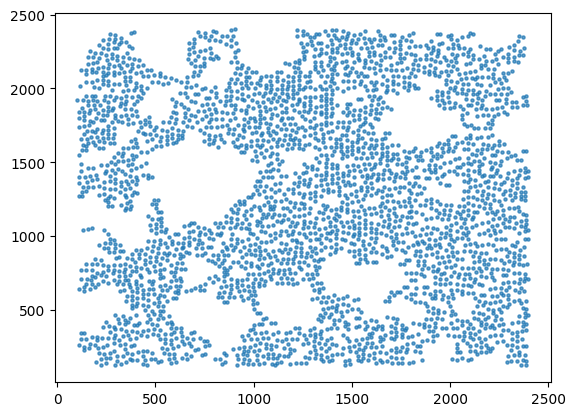

In [28]:
from matplotlib import pyplot as plt
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=5, alpha=0.7)

We can do several things from here with our 3000 pair dataset. 

In [17]:
from gudhi import AlphaComplex
from gudhi.representations import PersistenceImage

In [29]:
alpha_complex = AlphaComplex(coordinates)
simplex_tree = alpha_complex.create_simplex_tree()

Lets now extract the persistent homology

In [41]:
persistence = simplex_tree.persistence()

segments = 5
segment_size = len(persistence) // segments
for i in range(segments):
    start = i * segment_size
    end = (i+1) * segment_size if i < segments-1 else len(persistence)
    segment_dims = [dim for dim, _ in persistence[start:end]]
    print(f"Segment {i+1}: Dim 0: {segment_dims.count(0)}, Dim 1: {segment_dims.count(1)}, Dim 2: {segment_dims.count(2)}")

Segment 1: Dim 0: 0, Dim 1: 1523, Dim 2: 0
Segment 2: Dim 0: 0, Dim 1: 1523, Dim 2: 0
Segment 3: Dim 0: 292, Dim 1: 1231, Dim 2: 0
Segment 4: Dim 0: 1523, Dim 1: 0, Dim 2: 0
Segment 5: Dim 0: 1525, Dim 1: 0, Dim 2: 0


In [49]:
#for H0 - connected components

pd_0 = []

for dim, (birth, death) in persistence:
    if dim == 0:
        pd_0.append((birth, death))
        
        
        
print(pd_0)

[(0.0, inf), (0.0, 988.0299100466549), (0.0, 888.0168452341934), (0.0, 673.0609829779459), (0.0, 595.0265440379746), (0.0, 575.1227592720263), (0.0, 552.4855197415283), (0.0, 548.6190719833291), (0.0, 546.6235813298829), (0.0, 546.4727612359893), (0.0, 545.9184139357577), (0.0, 485.63620036285727), (0.0, 483.23679262345917), (0.0, 473.4638580208086), (0.0, 466.1288817938355), (0.0, 450.41258455183015), (0.0, 446.24433440392704), (0.0, 441.1584243752444), (0.0, 437.7022197224585), (0.0, 437.70221972245577), (0.0, 435.49223972802645), (0.0, 435.49223935462663), (0.0, 434.8027408531671), (0.0, 432.05723316938315), (0.0, 430.23639862400665), (0.0, 426.0292623971094), (0.0, 422.5974500603109), (0.0, 418.64323122390186), (0.0, 415.3054343539369), (0.0, 415.3054262023175), (0.0, 415.2659127866765), (0.0, 412.0051556626778), (0.0, 402.3884340163757), (0.0, 401.8983663936462), (0.0, 397.833678376898), (0.0, 396.6260271395204), (0.0, 394.79638115616444), (0.0, 392.73529438911754), (0.0, 392.0719